Jonatan Baumgartner Massimo De Santis Florian Feuillade

# PW4 - Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

Text(0, 0.5, 'Number of flat')

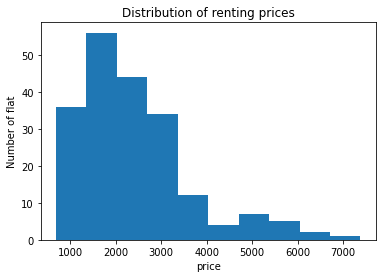

In [5]:
plt.hist(dataset["rent_price"])
plt.title("Distribution of renting prices")
plt.xlabel("price")
plt.ylabel("Number of flat")

b) Plot a histogram to visualize the distribution of the living area

Text(0, 0.5, 'Number of flat')

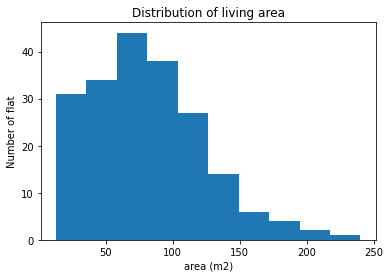

In [6]:
plt.hist(dataset["living_area"])
plt.title("Distribution of living area")
plt.xlabel("area (m2)")
plt.ylabel("Number of flat")

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'Price')

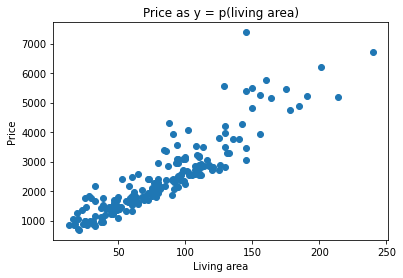

In [7]:
plt.scatter(dataset["living_area"], dataset['rent_price'])
plt.title("Price as y = p(living area)")
plt.xlabel("Living area")
plt.ylabel("Price")

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

In [8]:
X0=np.ones(len(dataset["living_area"].values))
X1=dataset["living_area"].values
X = np.column_stack((X0, X1))
y = dataset["rent_price"].values
XT = np.transpose(X)

Xt_dot_X = XT.dot(X)

tmp_inv = np.linalg.inv(Xt_dot_X)
tmp_2 = XT.dot(y)

thetas = tmp_inv.dot(tmp_2)
thetas

array([240.07710727,  26.33242457])

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [9]:
def j(theta, x, y, n):
    return np.sum(((theta[0] + x*theta[1]) - y)**2) / (2*n)

# x = np.reshape(dataset['living_area'].values, (len(dataset),1))
jt = j(thetas, dataset['living_area'].values, y, len(dataset))
print(jt)

138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [10]:
def hTheta(theta0, theta1, x):
    return theta0 + theta1 * x
def gradientDescent(X, Y, alpha=0.000001, nbIter=1000):
    N = len(X)
    theta0 = 0 #np.random.randn(1)
    theta1 = 0 #np.random.randn(1)
    costs = []
    for i in range(nbIter):
        sumTheta0 = 0
        sumTheta1 = 0
        sumCost = 0
        for i in range(N):
            tmp = hTheta(theta0, theta1, X[i]) - Y[i]
            sumTheta0 += tmp
            sumTheta1 += tmp * X[i]
            sumCost += tmp**2
        costs.append(1 / (2*N) * sumCost)
        theta0 = theta0 - alpha * 1/N * sumTheta0
        theta1 = theta1 - alpha * 1/N * sumTheta1
    return theta0, theta1, costs

theta0, theta1, costs = gradientDescent(dataset['living_area'].values, y)
print("Theta 0 : ", theta0)
print("Theta 1 : ", theta1)

Theta 0 :  0.32874661344807843
Theta 1 :  28.649555944396436


a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

Text(0, 0.5, 'Cost')

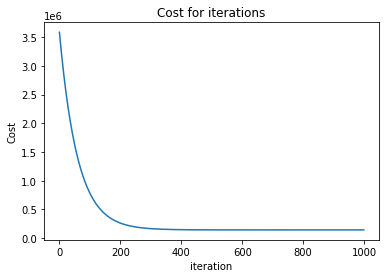

In [11]:
plt.plot(costs)
plt.title("Cost for iterations")
plt.xlabel("iteration")
plt.ylabel("Cost")

On voit d'abord une forte amélioration qui commence à stagner lorsqu'on s'approche de la solution optimale

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

lorsque la différence de cout entre deux itération est très faible

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

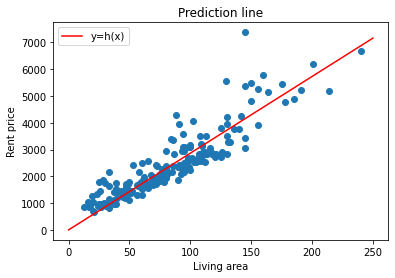

In [12]:
plt.scatter(dataset['living_area'].values, dataset["rent_price"].values)
x = np.linspace(0, 250)
h = theta0 + theta1*x
plt.plot(x, h, color="red", label="y=h(x)")
plt.title("Prediction line")
plt.xlabel("Living area")
plt.ylabel("Rent price")
plt.legend()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [13]:
costs[-1]

144159.35828160087

le cout de l'ex3 144159 est plus faible que celui de l'ex2 276588446. le déscente de gradient fonctionne donc mieux.

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [14]:
def hTheta(theta0, theta1, x):
    return theta0 + theta1 * x

def gradientDescent(X, Y, alpha=0.000001, nbIter=500):
    N = len(X)
    theta0 = 0 #np.random.randn(1)
    theta1 = 0 #np.random.randn(1)
    costs = []
    for i in range(nbIter):
        index = np.random.randint(0, N)
        tmp = hTheta(theta0, theta1, X[index]) - Y[index]
        sumCost = sum(map(lambda i : hTheta(theta0, theta1, X[i]) - Y[i], range(N)))
        costs.append(1 / (2*N) *  sumCost**2)
        theta0 = theta0 - alpha  * tmp
        theta1 = theta1 - alpha * tmp * X[index]
    return theta0, theta1, costs

theta0, theta1, costs = gradientDescent(dataset['living_area'].values, dataset["rent_price"].values)

Text(0, 0.5, 'Cost')

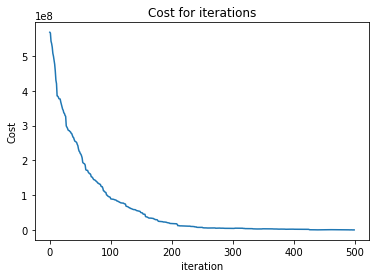

In [15]:
plt.plot(costs)
plt.title("Cost for iterations")
plt.xlabel("iteration")
plt.ylabel("Cost")

a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

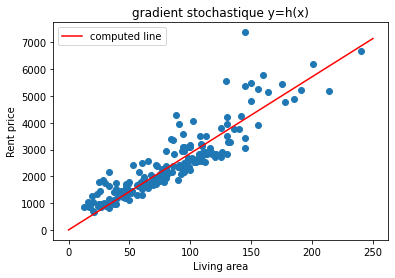

In [16]:
plt.scatter(dataset['living_area'].values, dataset["rent_price"].values)
x = np.linspace(0, 250)
y = theta0 + theta1*x
plt.plot(x, y, color="red", label="computed line")
plt.title("gradient stochastique y=h(x)")
plt.xlabel("Living area")
plt.ylabel("Rent price")
plt.legend()

b) How many samples do you need to visit for reaching the convergence?

Cela dépends de la convergence voulue (environ 400)

c) What kind of stopping criterion could we use here?

Comme avant

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

In [17]:
costs[-1]

325573.6063435837

le cout est très légerement supérieur à avant. le gain de temps par rapport à l'augmentation de cout est apréciable.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

Si le problème n'est pas linéair

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

Ces valeurs peuvent impacter temporairement le calul. il vaudrait mieux les filtrer lors du pré traitement des données. dans le cas du stochastique, si une de ces valeurs est utilisé, celà va faire un énorme écart. plus on a de outliers plus le problème est amplifié

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

Trop grand, l'apprentissage sera trop variable qui ne va pas forcément bien converger
Trop petit, cela créera des lenteur et augment les chances de tomber dans un minimum local

On pourrait commencer avec un grand alpha puis le diminuer petit à petit

d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

On ajoute de nouvelle features Xd^2 ou 3. 

e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

_Your answer here_